## Metagenomic processing

In [21]:
import qiime2
import biom
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
import glob

max depth of mtg 195,884

In [ ]:
biom convert \
-i /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/pfam_clean_noNT.txt \
-o /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/pfam_clean_noNT.biom \
--table-type="OTU table" \
--to-hdf5

qiime tools import \
--input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/pfam_clean_noNT.biom \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/pfam_clean_noNT.qza \
--type FeatureTable[Frequency]

In [ ]:
qiime diversity alpha-rarefaction \
  --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/pfam_clean_noNT.qza \
  --p-max-depth 20000 \
  --p-min-depth 1000 \
  --p-steps 10 \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/metaG_metadata_noNT.txt \
  --output-dir /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/alpha-rarefaction20k \
  --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/alpha-rarefaction20k.qzv

In [ ]:
qiime diversity core-metrics \
  --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/pfam_clean_noNT.qza \
  --p-sampling-depth 12000 \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/metaG_metadata_noNT.txt \
  --output-dir /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/diversity-core-metrics12k/

## get the depth of the genome.tsv file for the not norm table

max depth of mtg 113,935

In [ ]:
biom convert \
-i /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/genome_clean_noNT.txt \
-o /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/genome_clean_noNT.biom \
--table-type="OTU table" \
--to-hdf5

qiime tools import \
--input-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/genome_clean_noNT.biom \
--output-path /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/genome_clean_noNT.qza \
--type FeatureTable[Frequency]

In [ ]:
qiime diversity alpha-rarefaction \
  --i-table /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/genome_clean_noNT.qza \
  --p-max-depth 500000 \
  --p-min-depth 1000 \
  --p-steps 10 \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/metaG_metadata_noNT.txt \
  --output-dir /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/g-alpha-rarefaction500k \
  --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/g-alpha-rarefaction500k.qzv

## Get beta diversity

In [ ]:
qiime deicode rpca \
    --i-table /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/pfam/pfam_clean_noNT.qza \
    --p-min-feature-count 15 \
    --p-min-sample-count 500 \
    --o-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/ordination_deicode_TRFmetaG_noNT.qza \
    --o-distance-matrix /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/beta_deicode_TRFmetaG_noNT.qza

In [ ]:
qiime emperor biplot \
    --i-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/ordination_deicode_TRFmetaG_noNT.qza \
    --m-sample-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/metaG_metadata_noNT.txt \
    --p-ignore-missing-samples \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/ordination_deicode_TRFmetaG_biplot.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/beta_deicode_TRFmetaG_noNT.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/metaG_metadata_noNT.txt \
    --m-metadata-column condition \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/beta_deicode_TRFmetaG_noNT-significanceCond.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/metaG_rpca_results/distance_matrix.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/metaG_metadata_noNT.txt \
    --m-metadata-column cond_phase \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/metaG_rpca_results/condphase-significance.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/metaG_rpca_results/distance_matrix.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/metaG_metadata_noNT.txt \
    --m-metadata-column cond_zt \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/TRF_multiomics/metagenomic/woltka2_results/filtered_metaG/pfam_notnorm/metaG_rpca_results/condzt-significance.qzv

In [ ]:
qiime diversity beta-group-significance \
    --i-distance-matrix /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/beta_deicode_TRFmetaG_noNT.qza \
    --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/metaG_metadata_noNT.txt \
    --m-metadata-column lightdark \
    --p-method permanova \
    --p-pairwise \
    --o-visualization /mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/beta_deicode_TRFmetaG_noNT-significanceLD.qzv

Visualize the biplot adding feature info

In [15]:
# import the sample metadata
mf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/metaG_metadata_noNT.txt',
                 sep='\t', index_col=0, keep_default_na=False)
# import the taxonomy metadata
tf = pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/pfam/pfam_annotationkey.csv',
                index_col=0)
tf.tail(2)

,Name
FeatureID,
PF19517.2,Family of unknown function (DUF6050)
PF06368.14,Methylaspartate mutase E chain (MutE)


In [16]:
# the sample loadings
#spca_df = ordination.samples
#spca_df.head(2)

spca_df = pd.read_csv('/home/sfloresr/scratch/metatranscript/anvi_metagenomic/woltka2_results/ordination_deicode_TRFmetaG_noNT/sample_ordination.txt',
                 sep='\t', index_col=0)
spca_df.head(2)

,PC1,PC2,PC3
SampleID,,,
FA1b,-0.017126,0.063451,-0.127224
FA1c,-0.213840,0.021268,-0.074003


In [17]:
# the feature loadings
#fpca_df = ordination.features
#fpca_df.reset_index(drop=True, inplace=True)

fpca_df = pd.read_csv('/home/sfloresr/scratch/metatranscript/anvi_metagenomic/woltka2_results/ordination_deicode_TRFmetaG_noNT/feature_ordination.txt',
                     sep='\t', index_col=0)

fpca_df.tail(2)

,PC1,PC2,PC3
FeatureID,,,
PF06319.15,0.000371,-0.003036,0.005762
PF14239.9,0.015826,-0.009709,0.000437


In [18]:
# merge the sample metadata and loadings
spca_df = pd.concat([spca_df, mf.reindex(spca_df.index)],
                    axis=1, sort=True)
spca_df['condition'].astype('category').cat.reorder_categories(['FT','FA','NA'], inplace=True)
spca_df.head(2)

,PC1,PC2,PC3,condition,diet,schedule,zt_time,replicate,lightdark
SampleID,,,,,,,,,
FA1b,-0.017126,0.063451,-0.127224,FA,high fat diet,ad libitum,13,b,dark
FA1c,-0.213840,0.021268,-0.074003,FA,high fat diet,ad libitum,13,c,dark


In [19]:
# merge the feature metadata and loadings

fpca_df = pd.concat([fpca_df, tf.reindex(fpca_df.index)],
                    axis=1)
fpca_df.tail(2)

,PC1,PC2,PC3,Name
FeatureID,,,,
PF06319.15,0.000371,-0.003036,0.005762,DNA repair protein MmcB-like
PF14239.9,0.015826,-0.009709,0.000437,RRXRR protein


In [24]:
def biplot(axis1, axis2, sload, fload, hue, ax,
           n_arrow= 20, cmap = 'Set1'):
    
    """
    This function is a helper for the tutorial. It
    takes ordination inputs from the tutorial and
    plots a compositional biplot.
    
    Parameters
    ----------
    axis1: str - first x-PC axis
    axis2: str - second y-PC axis
    
    sload: pd.DataFrame - sample ordination
    fload: pd.DataFrame - feature ordination
    hue: str - subject groupings
        
    ax: matplitlib subplot
    n_arrow: int - number of arrows to plot
    level: int - taxonomic level to collapse
    Returns
    ----------
    ax: matplitlib subplot
    """
    # Create an array with the colors you want to use
    colors = ["#0072B2","#D55E00","#009E73"]
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    
    # sort the arrows by their PC1, PC2 mag.
    fload['magnitude'] = np.linalg.norm(fload[[axis1, axis2]], axis=1)
    fload = fload.sort_values('magnitude', ascending=False)
    
    # get cmap for arrows
    arrow_cmap = set(fload.loc[fload.index[: n_arrow], 'Name'].values)
    colors_ = plt.get_cmap(cmap, len(arrow_cmap))
    arrow_cmap = {v:colors_(i) for i, v in enumerate(arrow_cmap)}
    

 # plot the sample loadings
    sns.scatterplot(axis1, axis2,
                    data = sload,
                    hue = hue,
                    hue_order = ['FT', 'FA', 'NA'],
                    palette=colors,
                    ax=ax,
                    s=100)
    
    # plot the arrows
    legend_arrows = {}
    for i in range(n_arrow):
        # add arrow
        ind_ = fload.index[i]
        arrow_  = ax.arrow(0, 0, fload.loc[ind_, axis1],
                        fload.loc[ind_, axis2],
                        color=arrow_cmap[fload.loc[ind_, 'Name']],
                        width=0.001, head_width=0.005)
        legend_arrows[fload.loc[ind_, 'Name']] = arrow_
    
    # add legend
    leg1 = ax.legend(loc='center left',
                     bbox_to_anchor=(1, .8),
                     title="condition (dots)")
    ax.legend(list(legend_arrows.values()),
              list(legend_arrows.keys()), 
              loc='center left',
              bbox_to_anchor=(1, 0.5),
              title="genes (arrows)")
    ax.add_artist(leg1)
    
    #modify individual font size of elements
    #ax.tick_params(axis='both', which='major', labelsize=0.5)
        
    return ax

/opt/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


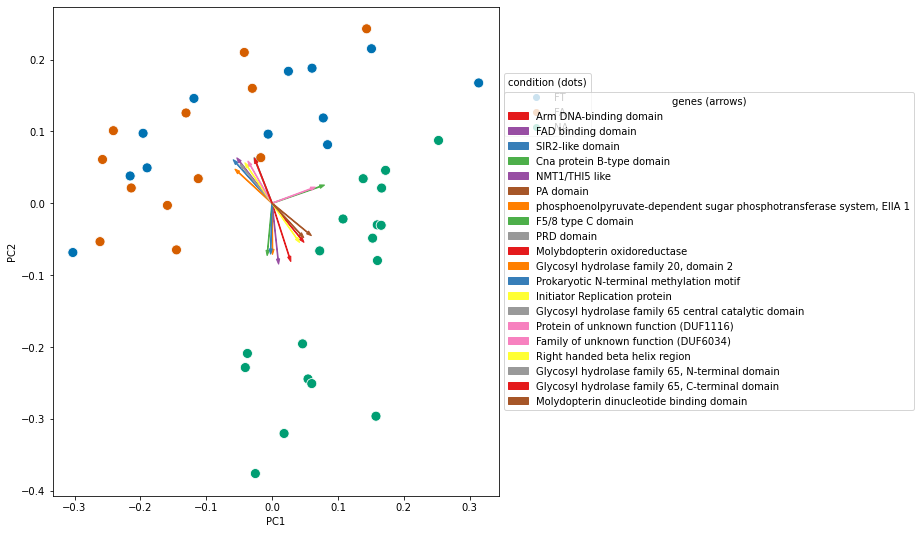

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8, 9))

# plot the biplot
ax = biplot('PC1', 'PC2', spca_df,
            fpca_df, 'condition', ax)

plt.show()
#plt.savefig('/mnt/zarrinpar/scratch/sfloresr/HE/HE_metab/liverpath/diversity_metrics_LCMS/SFR22_0304_biplot_perifAll_warrows.pdf',
#            dpi=300,bbox_inches='tight')

## Songbird Analysis ##

**FA vs. FT**

In [ ]:
biom convert \
    -i /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FAFT.txt\
    -o /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FAFT.biom \
    --table-type="OTU table" \
    --to-hdf5

qiime tools import \
    --input-path /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FAFT.biom \
    --output-path /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FAFT.qza \
    --type FeatureTable[Frequency]

now we load the biom into qiime

In [ ]:
qiime songbird multinomial \
  --i-table /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FAFT.qza \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/metaT_FAFT_metadata.txt \
  --p-formula "C(condition, Treatment('FA'))" \
  --p-epochs 5000 \
  --p-differential-prior 1 \
  --p-summary-interval 1 \
  --o-differentials /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/differentials_FAFT_conditionOnly.qza \
  --o-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-stats_FAFT_conditionOnly.qza \
  --o-regression-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-biplot_FAFT_conditionOnly.qza

In [ ]:
qiime songbird multinomial \
  --i-table /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FAFT.qza \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/metaT_FAFT_metadata.txt \
  --p-formula "1" \
  --p-epochs 5000 \
  --p-differential-prior 1 \
  --p-summary-interval 1 \
  --o-differentials /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null_differentials_FAFT_conditionOnly.qza \
  --o-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-stats_FAFT_conditionOnly.qza \
  --o-regression-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-biplot_FAFT_conditionOnly.qza

In [ ]:
qiime songbird summarize-paired \
	--i-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-stats_FAFT_conditionOnly.qza \
	--i-baseline-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-stats_FAFT_conditionOnly.qza \
	--o-visualization /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/paired-summary-FAFT_conditionOnly.qzv

**FT vs. NA**

In [ ]:
biom convert \
    -i /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FTNA.txt\
    -o /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FTNA.biom \
    --table-type="OTU table" \
    --to-hdf5

qiime tools import \
    --input-path /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FTNA.biom \
    --output-path /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FTNA.qza \
    --type FeatureTable[Frequency]

In [ ]:
qiime songbird multinomial \
  --i-table /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FTNA.qza \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/metaT_FTNA_metadata.txt \
  --p-formula "C(condition, Treatment('NA'))" \
  --p-epochs 5000 \
  --p-differential-prior 1 \
  --p-summary-interval 1 \
  --o-differentials /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/differentials_FTNA_conditionOnly.qza \
  --o-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-stats_FTNA_conditionOnly.qza \
  --o-regression-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-biplot_FTNA_conditionOnly.qza

In [ ]:
qiime songbird multinomial \
  --i-table /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FTNA.qza \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/metaT_FTNA_metadata.txt \
  --p-formula "1" \
  --p-epochs 5000 \
  --p-differential-prior 1 \
  --p-summary-interval 1 \
  --o-differentials /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null_differentials_FTNA_conditionOnly.qza \
  --o-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-stats_FTNA_conditionOnly.qza \
  --o-regression-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-biplot_FTNA_conditionOnly.qza

In [ ]:
qiime songbird summarize-paired \
	--i-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-stats_FTNA_conditionOnly.qza \
	--i-baseline-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-stats_FTNA_conditionOnly.qza \
	--o-visualization /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/paired-summary-FTNA_conditionOnly.qzv

**FA vs. NA**

In [ ]:
#dont run
biom convert \
    -i /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FANA.txt\
    -o /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FANA.biom \
    --table-type="OTU table" \
    --to-hdf5

qiime tools import \
    --input-path /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FANA.biom \
    --output-path /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FANA.qza \
    --type FeatureTable[Frequency]

In [ ]:
qiime songbird multinomial \
  --i-table /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FANA.qza \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/metaT_FANA_metadata.txt \
  --p-formula "C(condition, Treatment('NA'))" \
  --p-epochs 5000 \
  --p-differential-prior 1 \
  --p-summary-interval 1 \
  --o-differentials /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/differentials_FANA_conditionOnly.qza \
  --o-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-stats_FANA_conditionOnly.qza \
  --o-regression-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-biplot_FANA_conditionOnly.qza

In [ ]:
qiime songbird multinomial \
  --i-table /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FANA.qza \
  --m-metadata-file /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/metaT_FANA_metadata.txt \
  --p-formula "1" \
  --p-epochs 5000 \
  --p-differential-prior 1 \
  --p-summary-interval 1 \
  --o-differentials /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null_differentials_FANA_conditionOnly.qza \
  --o-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-stats_FANA_conditionOnly.qza \
  --o-regression-biplot /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-biplot_FANA_conditionOnly.qza

In [ ]:
qiime songbird summarize-paired \
	--i-regression-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/regression-stats_FANA_conditionOnly.qza \
	--i-baseline-stats /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/null-stats_FANA_conditionOnly.qza \
	--o-visualization /mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/songbird/paired-summary-FANA_conditionOnly.qzv

**convert counts tables to TPM**

In [4]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/pfam/pfam_FAFT.txt',
                     sep='\t', index_col=0)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/zarrinpar/scratch/sfloresr/metatranscript/anvi_metagenomic/woltka2_results/pfam/pfam_FAFT.txt'

In [14]:
df = df * 1000000 / df.sum()
df.head()

,cFA01a,cFA01b,cFA05a,cFA05b,cFA09a,cFA09b,cFA13a,cFA13b,cFA17a,cFA17b,...,cFT05a,cFT05b,cFT09a,cFT09b,cFT13a,cFT13b,cFT17a,cFT17b,cFT21a,cFT21b
FeatureID,,,,,,,,,,,,,,,,,,,,,
PF13561.9,290.152308,318.938010,118.945677,469.137006,411.935037,314.135808,263.543486,486.066428,382.549286,392.022535,...,356.400190,534.366809,210.596896,307.929526,194.514677,242.480643,148.536793,362.926854,165.340359,222.631694
PF08240.15,550.750044,374.455634,130.315049,380.091023,321.124175,448.453639,291.085729,336.206862,296.015240,340.594948,...,475.607055,503.282719,143.478864,348.793197,229.911509,488.456486,161.249766,530.861698,242.862180,285.868596
PF00107.29,548.495380,372.336166,128.647508,378.021686,315.225217,449.396895,288.876295,331.003210,294.763960,337.571020,...,475.864691,506.740483,141.366547,349.429501,227.929585,488.472966,161.194797,527.517662,243.494016,286.256560
PF12698.10,60.708069,34.170035,58.642755,56.044982,106.014833,34.870640,55.220567,126.830145,48.659486,52.674001,...,69.194907,197.533979,44.630241,53.519816,80.504233,70.547982,72.008675,121.511110,25.119077,24.023390
PF01264.24,23.237119,34.553989,16.306586,31.201636,28.509215,34.367571,23.243849,47.166977,24.993275,40.536689,...,10.048720,27.114771,18.953492,19.570258,12.624438,22.045343,8.500428,27.965999,19.511488,15.438243


In [15]:
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/pfam/pfam_FAFT_TPM.txt',
         sep='\t')

In [7]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/aidan_wol2_cyclic_analysis/wol2_genome_pipeline_SFR/filtered_genome_NA.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/aidan_wol2_cyclic_analysis/wol2_genome_pipeline_SFR/filtered_genome_NA_CPM.txt',
         sep='\t')

In [8]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/aidan_wol2_cyclic_analysis/wol2_genome_pipeline_SFR/filtered_genome_FA.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/aidan_wol2_cyclic_analysis/wol2_genome_pipeline_SFR/filtered_genome_FA_CPM.txt',
         sep='\t')

In [10]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/aidan_wol2_cyclic_analysis/wol2_genome_pipeline_SFR/filtered_genome_FT.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metatranscript/woltka2_results/aidan_wol2_cyclic_analysis/wol2_genome_pipeline_SFR/filtered_genome_FT_CPM.txt',
         sep='\t')

In [5]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/go/function_clean_noNT.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/go/function_clean_noNT_CPM.txt',
         sep='\t')

In [12]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FTNA.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FTNA_TPM.txt',
         sep='\t')

In [13]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FANA.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FANA_TPM.txt',
         sep='\t')

In [14]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FAFT.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FAFT_TPM.txt',
         sep='\t')

In [15]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FTNAL.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FTNAL_TPM.txt',
         sep='\t')

In [16]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FANAL.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FANAL_TPM.txt',
         sep='\t')

In [17]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FAFTL.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FAFTL_TPM.txt',
         sep='\t')

In [18]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FTNAD.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FTNAD_TPM.txt',
         sep='\t')

In [19]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FANAD.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FANAD_TPM.txt',
         sep='\t')

In [20]:
df= pd.read_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FAFTD.txt',
                     sep='\t', index_col=0)
df = df * 1000000 / df.sum()
df.to_csv('/mnt/zarrinpar/scratch/sfloresr/metatranscript/metagenomic/woltka2_results/filtered_metaG/pfam/pfam_FAFTD_TPM.txt',
         sep='\t')